In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv") 
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.shape

(6607, 20)

In [4]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [5]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
print("Original DataFrame Shape:", df.shape)

df = df.drop_duplicates()

df = df.dropna()

print("Cleaned DataFrame Shape:", df.shape)

Original DataFrame Shape: (6607, 20)
Cleaned DataFrame Shape: (6378, 20)


In [43]:
numerical_columns = ['Hours_Studied',	'Attendance',	'Sleep_Hours',	'Previous_Scores',	'Tutoring_Sessions',	'Physical_Activity',	'Exam_Score']
categorical_columns = [col for col in df.columns if col not in numerical_columns]

# Visualizing distribution of numerical columns

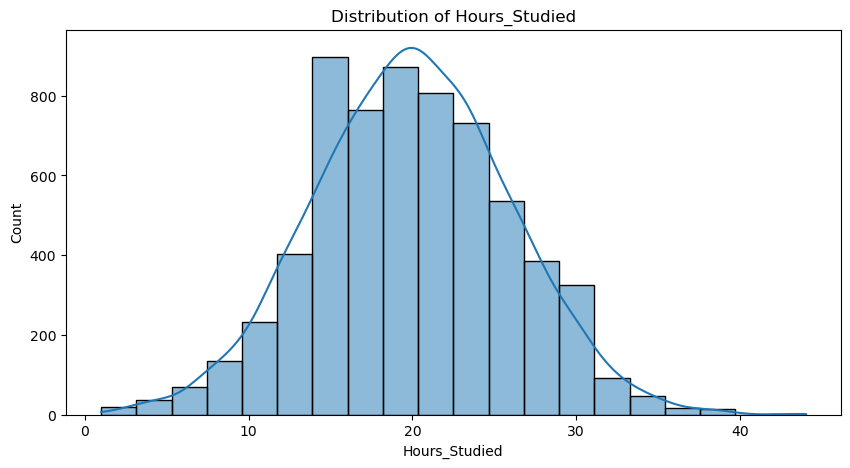

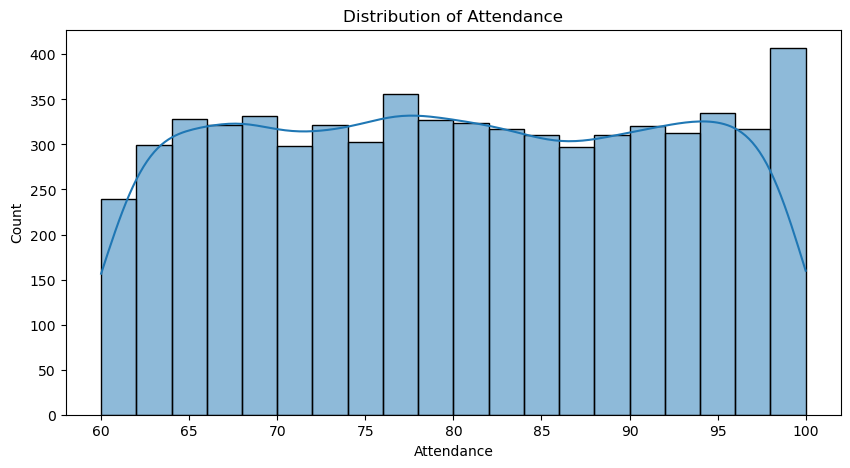

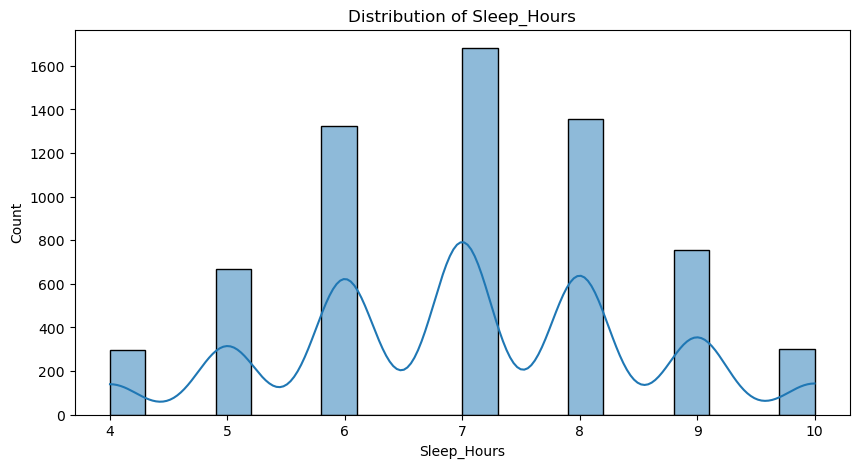

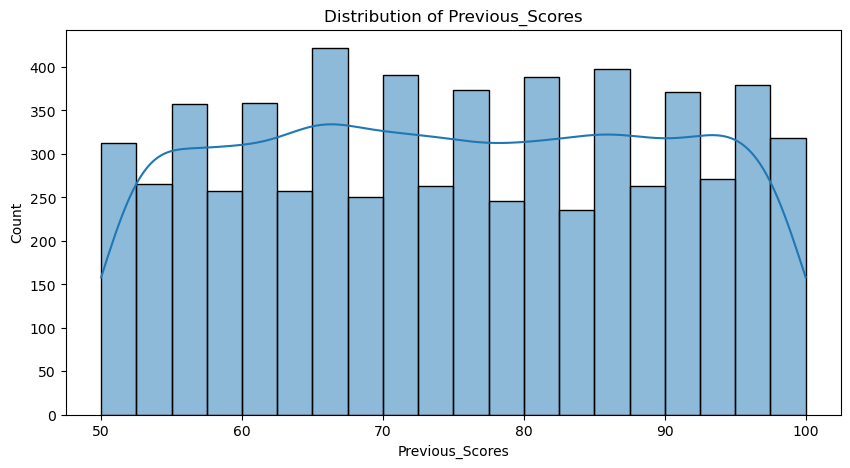

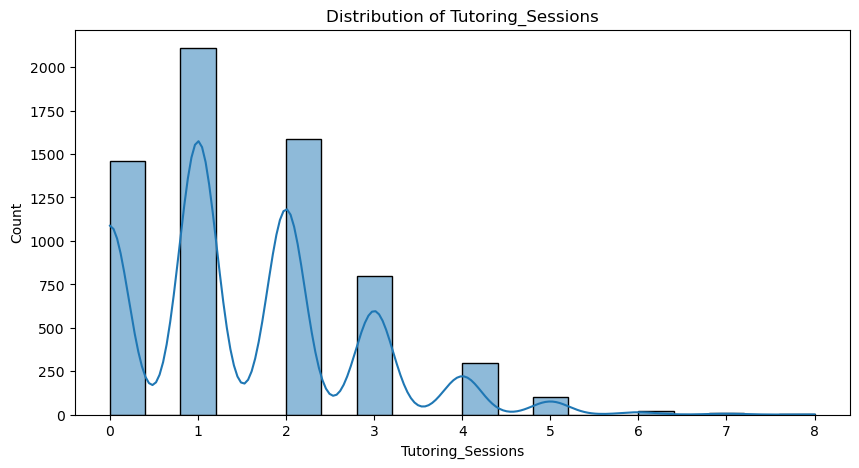

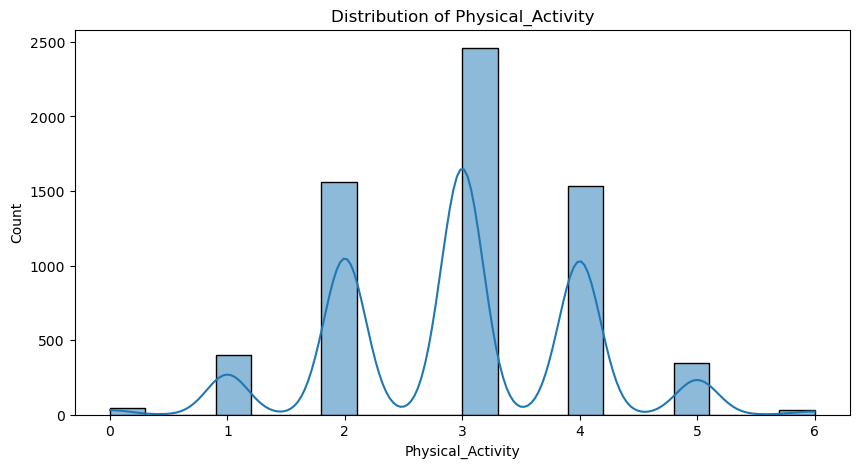

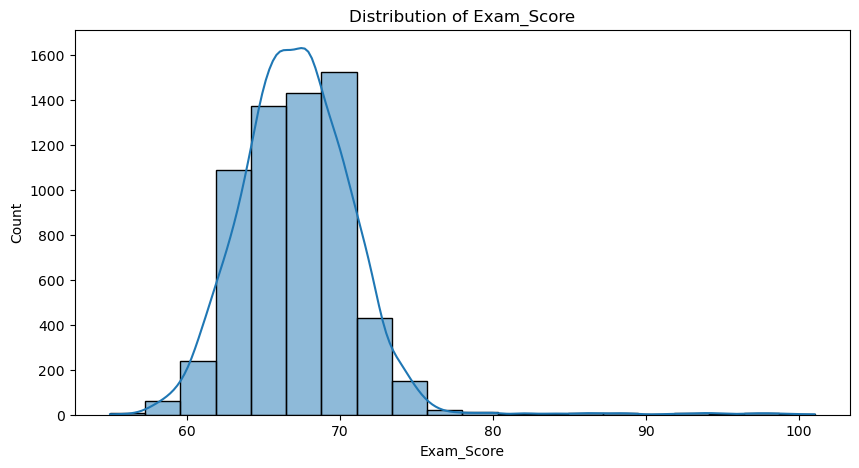

In [44]:
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

# Boxplot for outliers detection

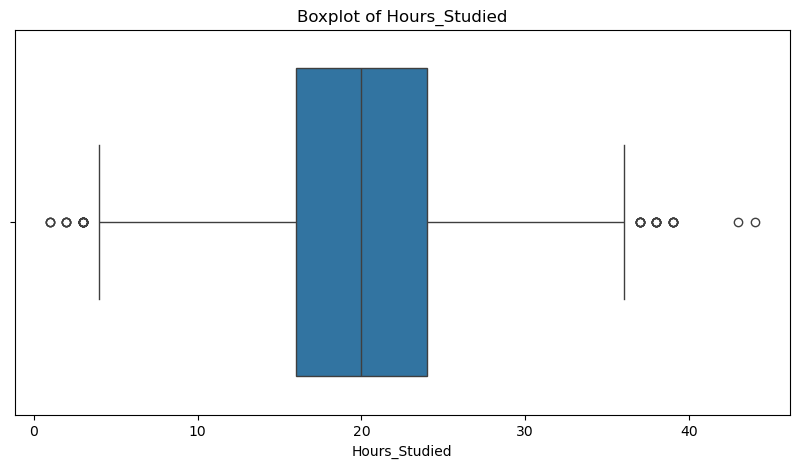

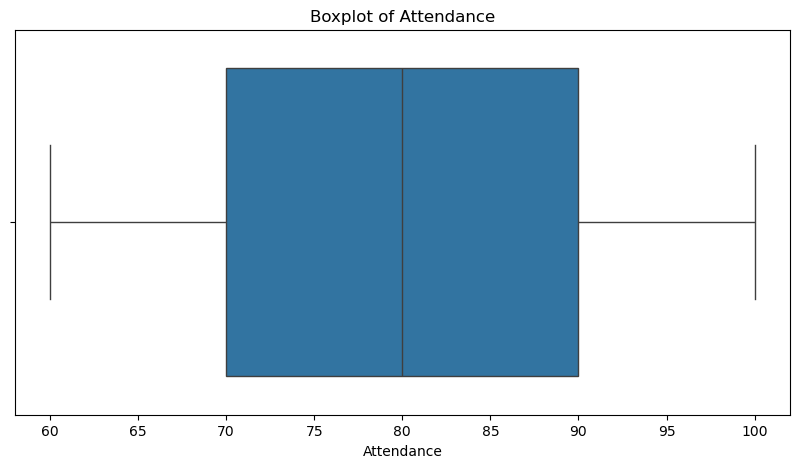

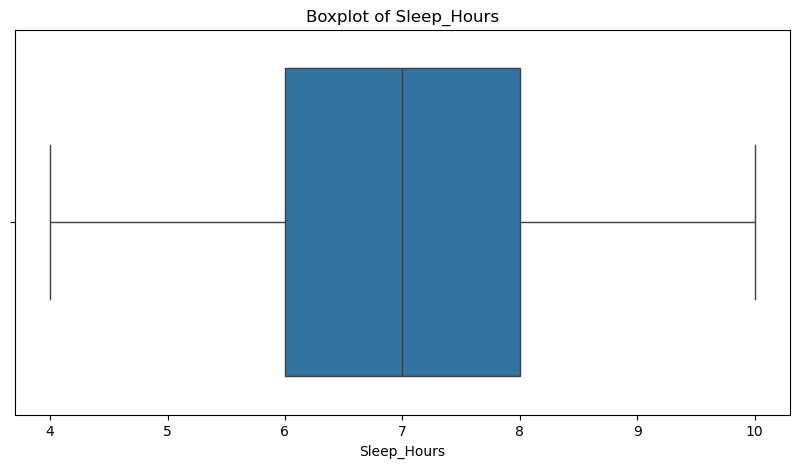

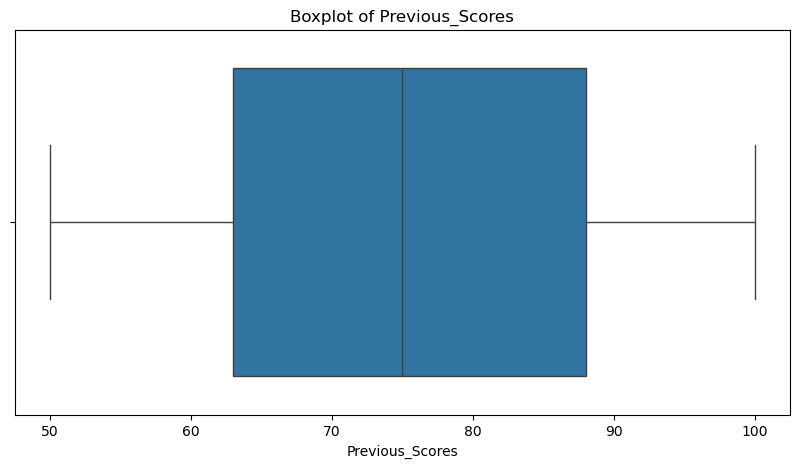

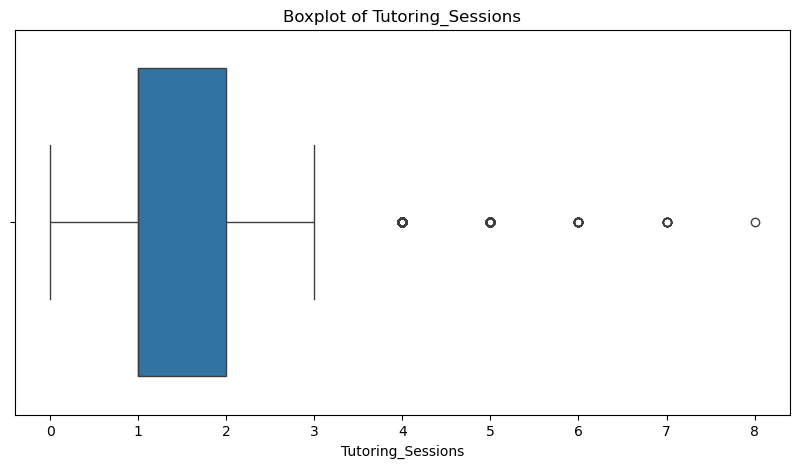

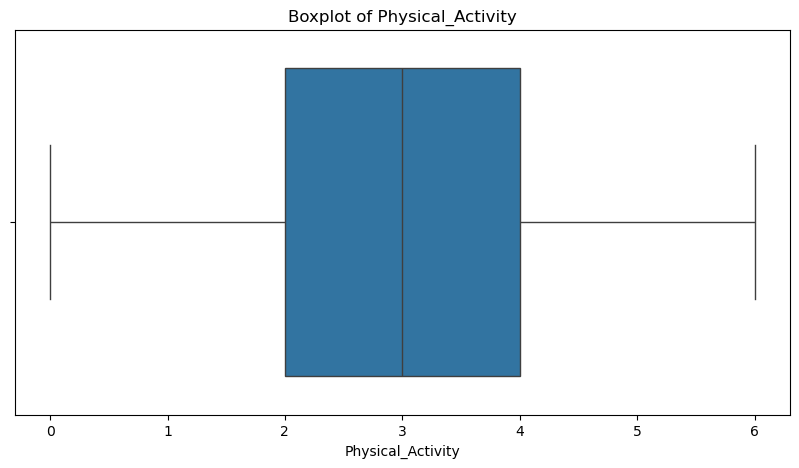

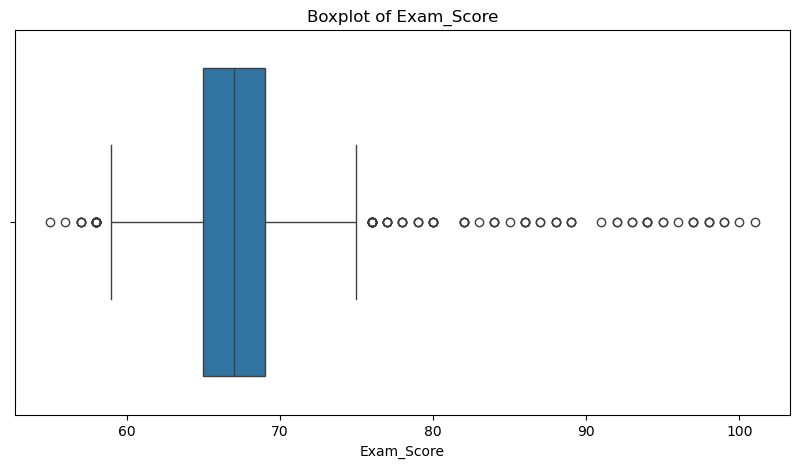

In [45]:
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [46]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


# Visualizing count of categories for categorical columns

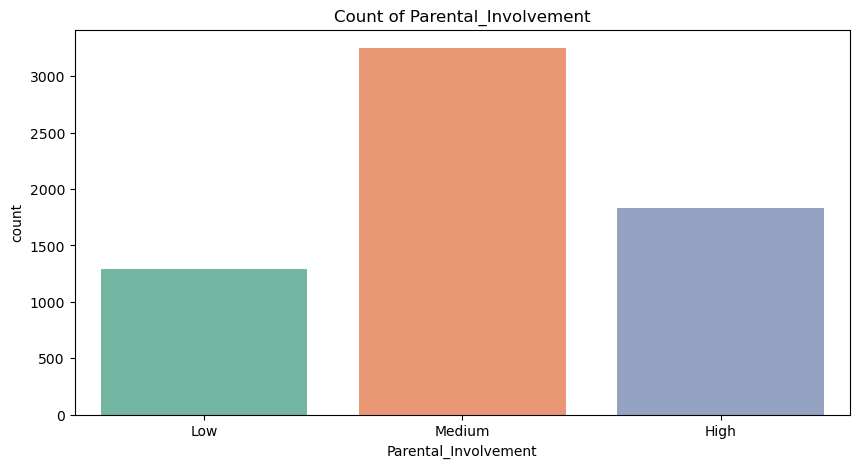

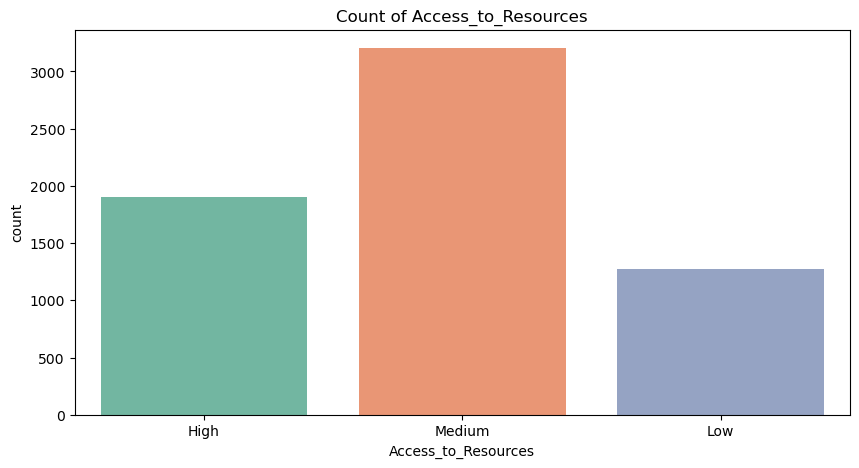

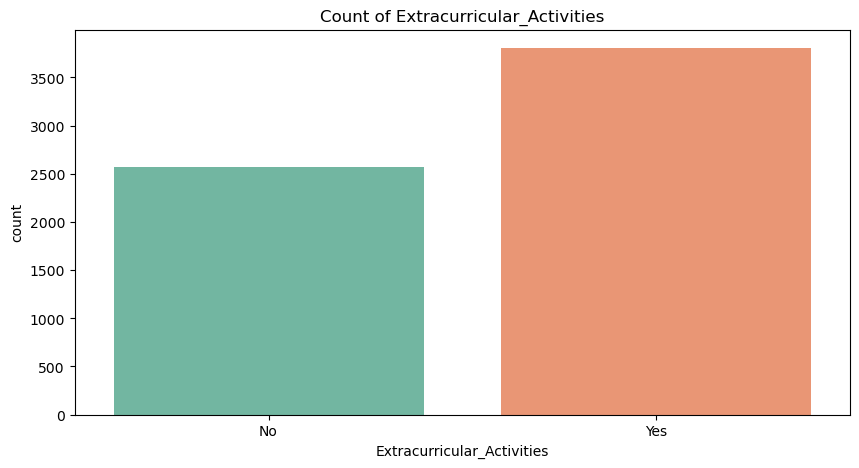

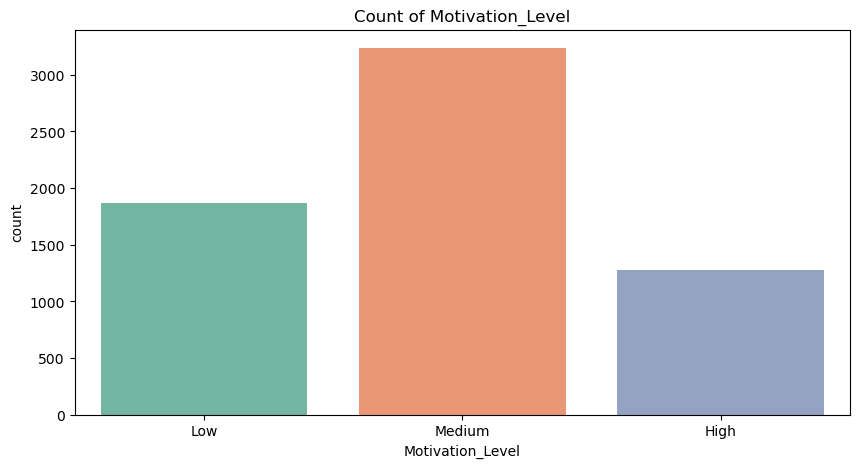

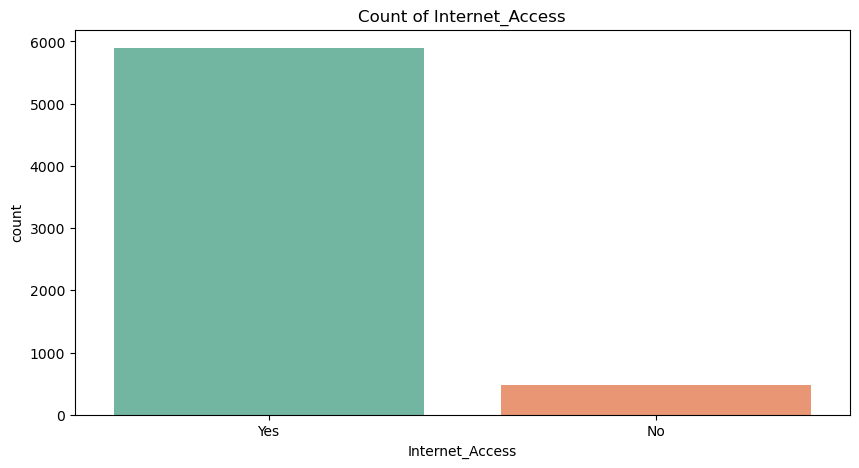

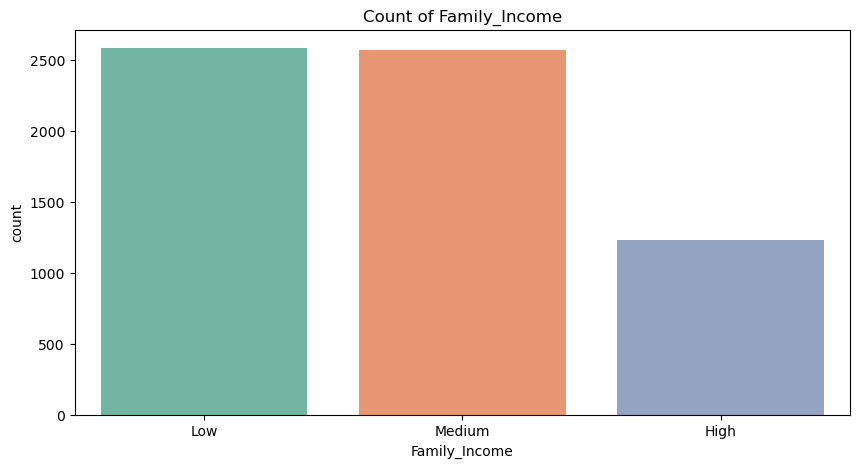

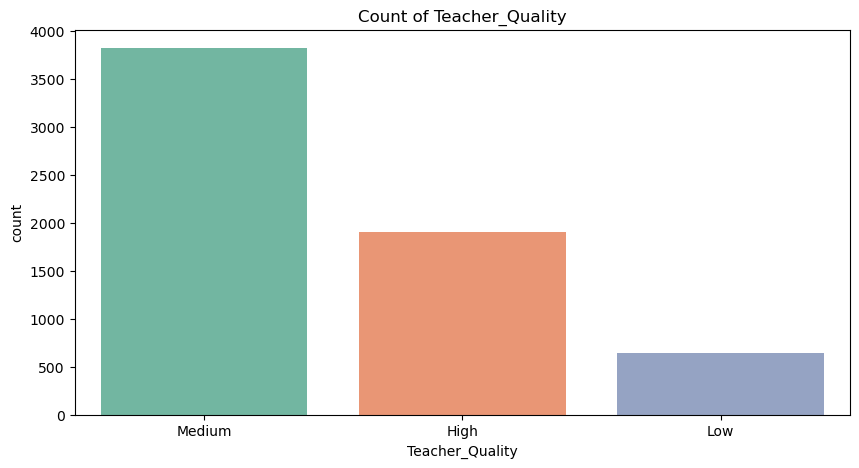

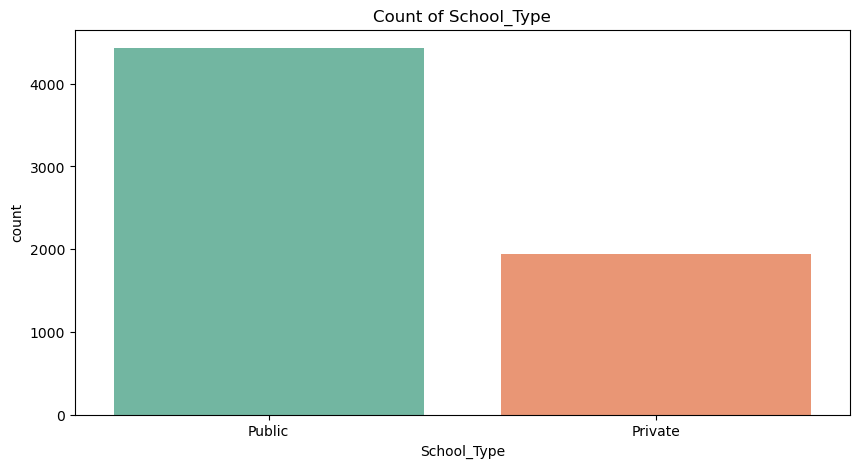

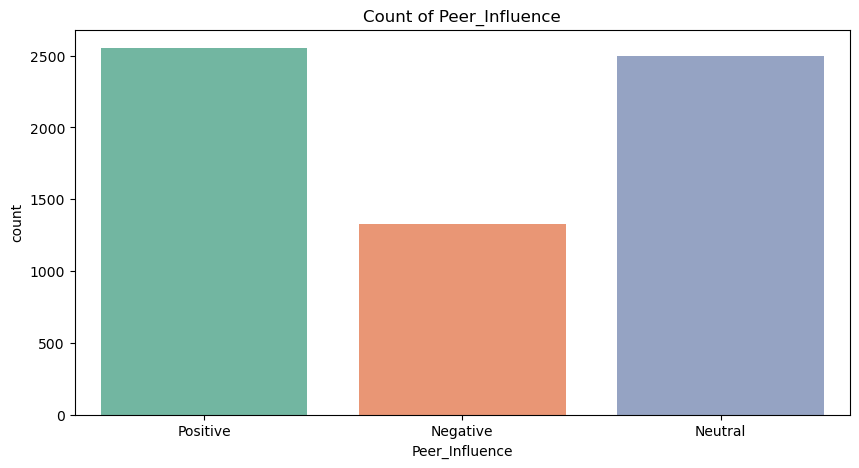

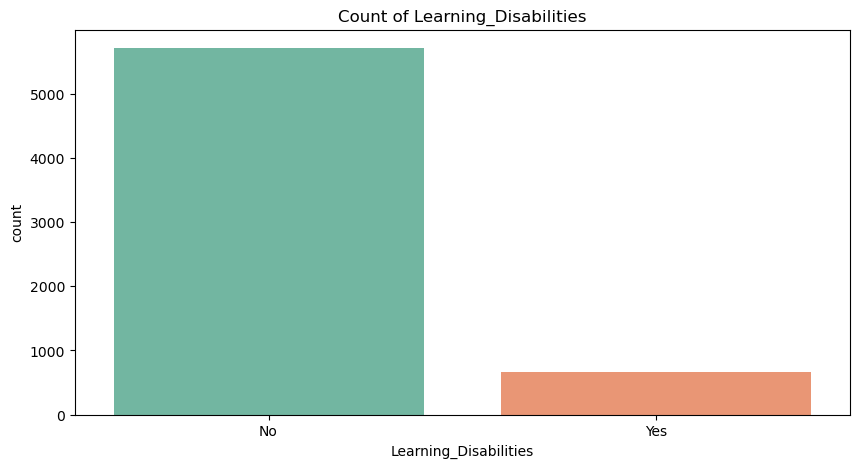

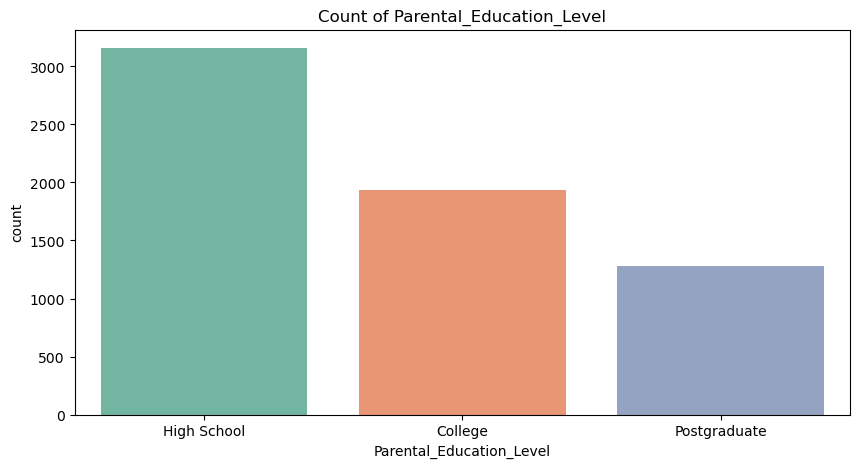

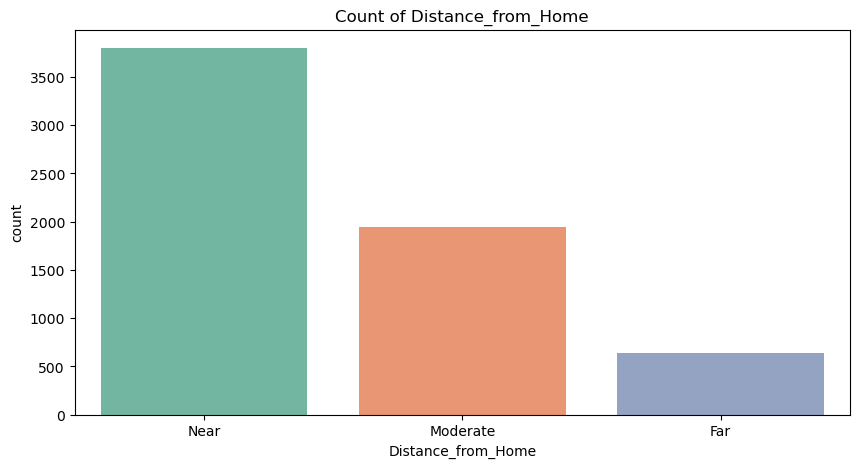

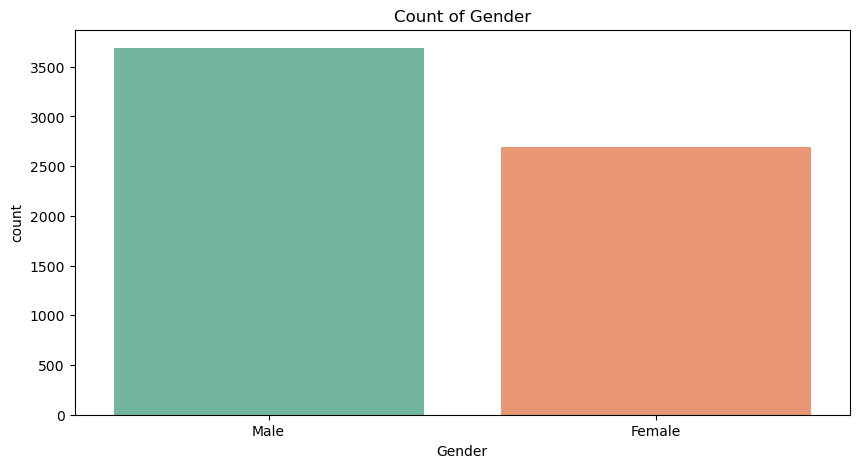

In [47]:
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f'Count of {col}')
    plt.show()

# Proportions of categories


In [48]:
for col in categorical_columns:
    print("-----------------")
    print(df[col].value_counts(normalize=True))

-----------------
Parental_Involvement
Medium    0.509721
High      0.287865
Low       0.202415
Name: proportion, dtype: float64
-----------------
Access_to_Resources
Medium    0.502352
High      0.297899
Low       0.199749
Name: proportion, dtype: float64
-----------------
Extracurricular_Activities
Yes    0.596896
No     0.403104
Name: proportion, dtype: float64
-----------------
Motivation_Level
Medium    0.507526
Low       0.292255
High      0.200220
Name: proportion, dtype: float64
-----------------
Internet_Access
Yes    0.923957
No     0.076043
Name: proportion, dtype: float64
-----------------
Family_Income
Low       0.404829
Medium    0.402320
High      0.192850
Name: proportion, dtype: float64
-----------------
Teacher_Quality
Medium    0.599875
High      0.298683
Low       0.101442
Name: proportion, dtype: float64
-----------------
School_Type
Public     0.695202
Private    0.304798
Name: proportion, dtype: float64
-----------------
Peer_Influence
Positive    0.400282
Neutra

# Correlation matrix

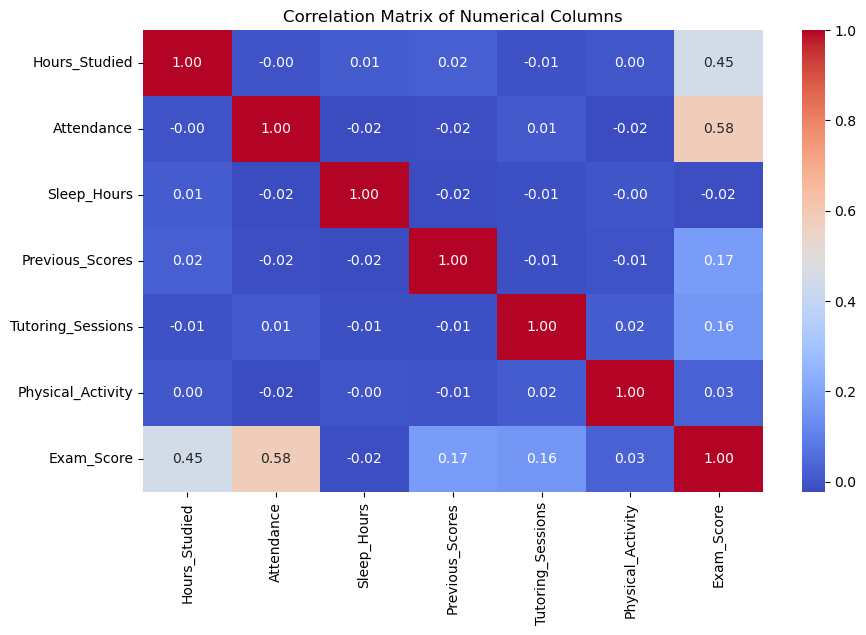

In [49]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

# Pairplot of numerical columns

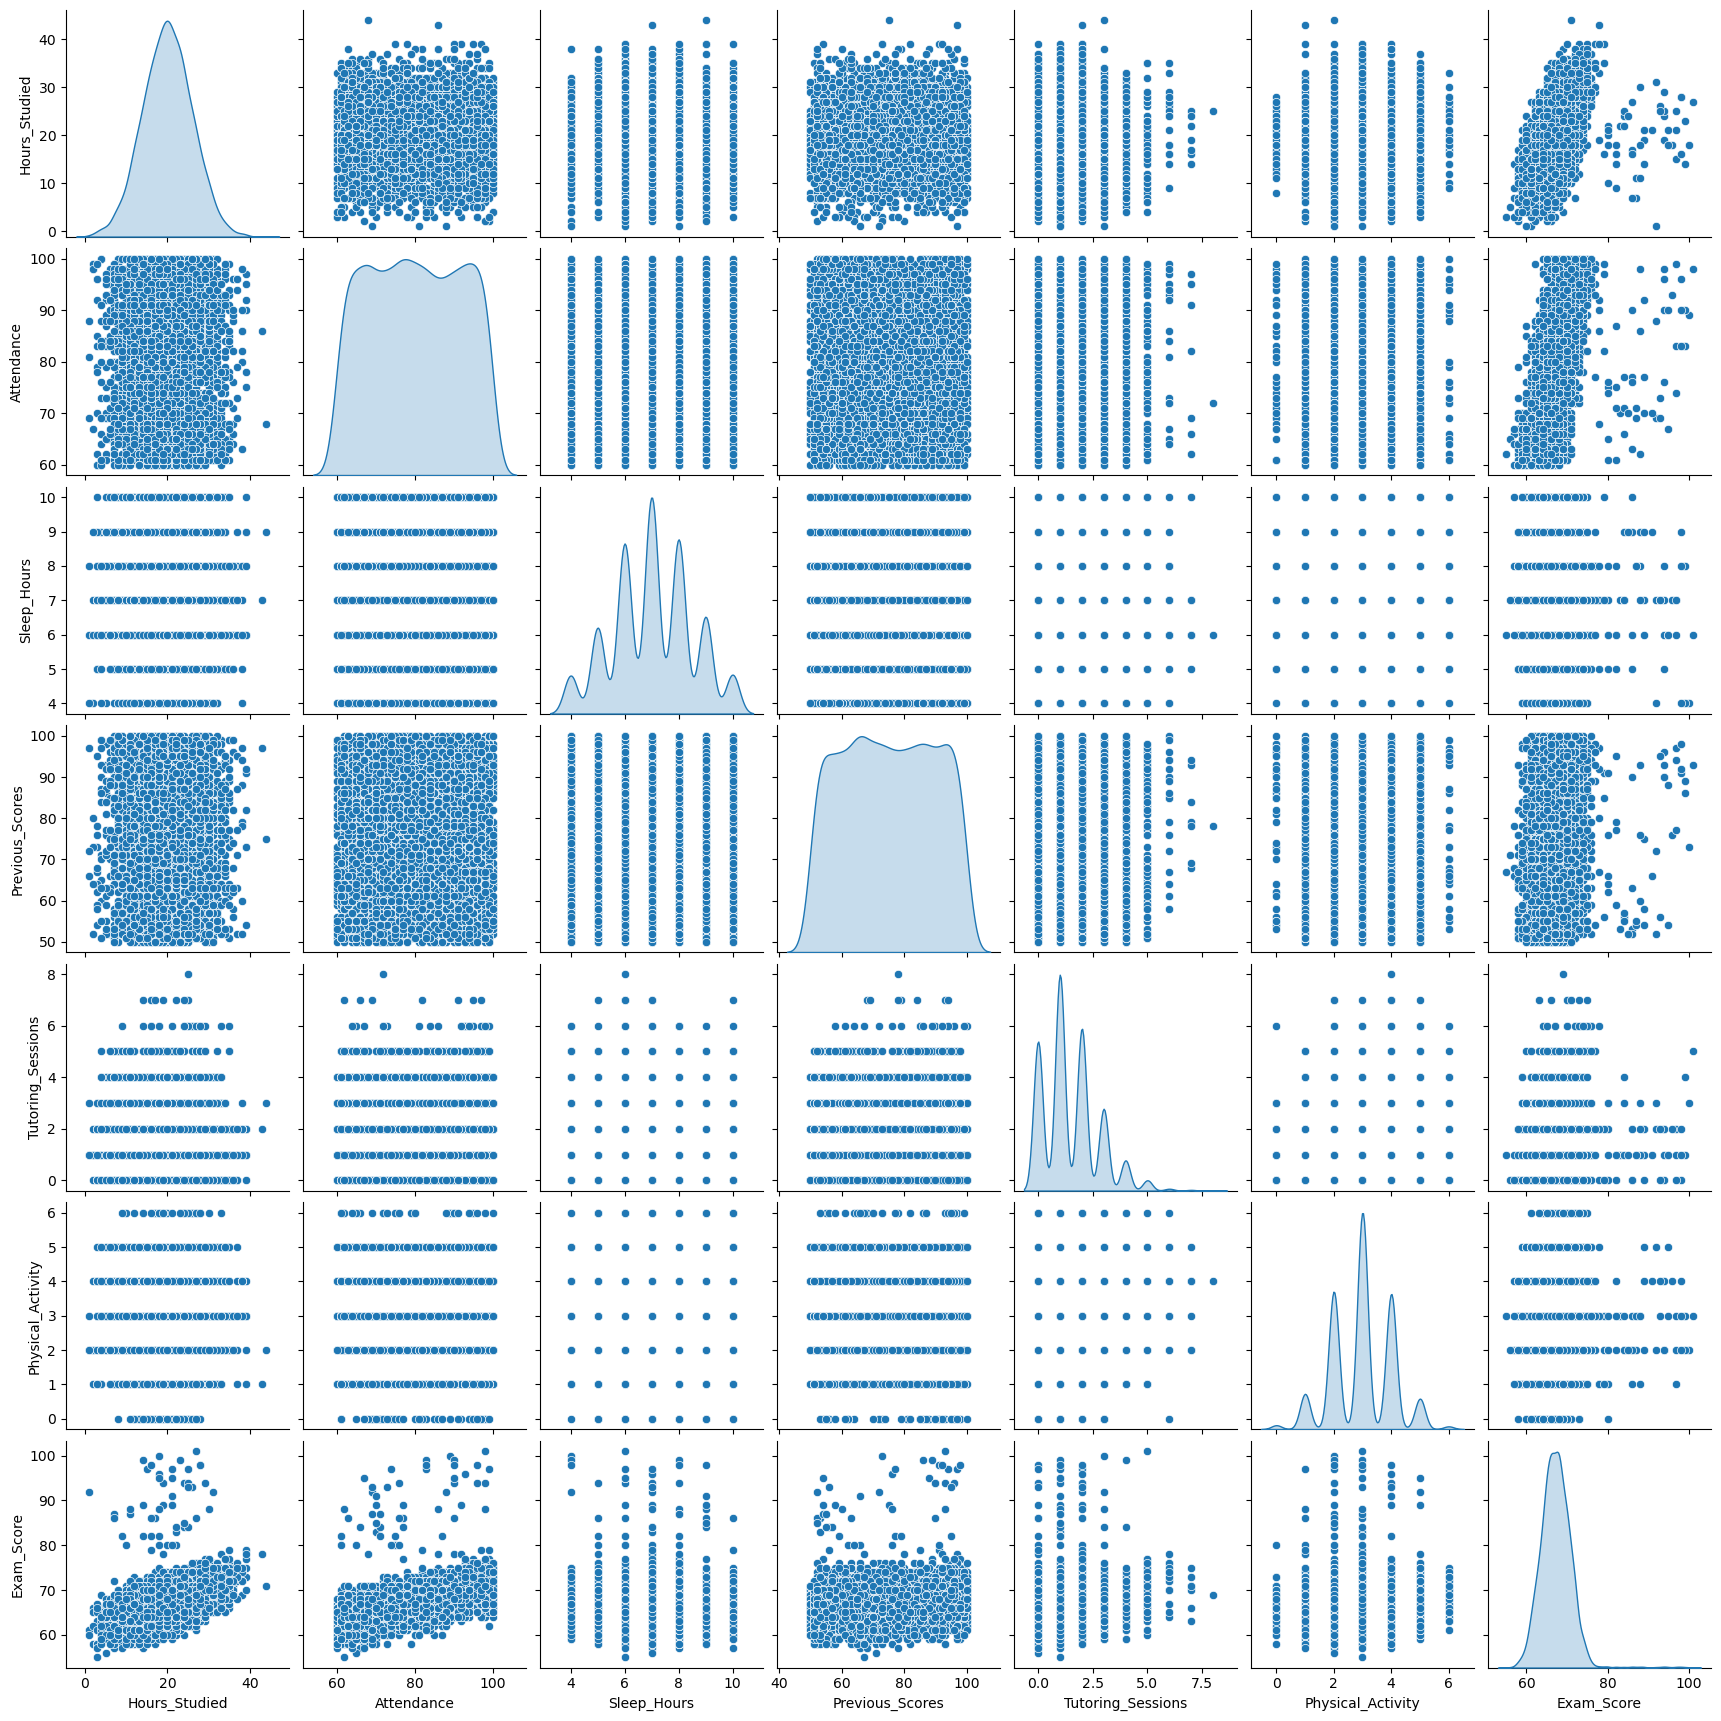

In [50]:
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.show()

# Boxplot of numerical values grouped by categorical columns


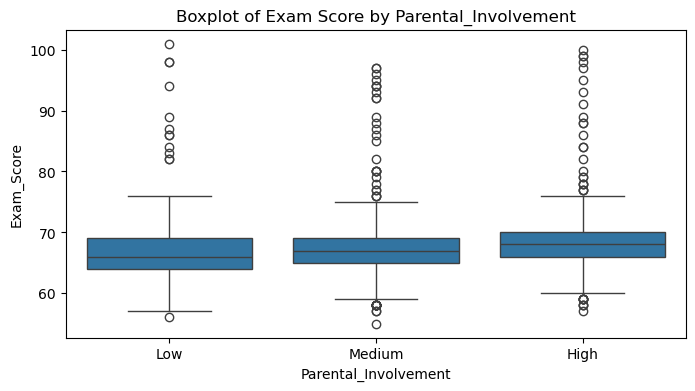

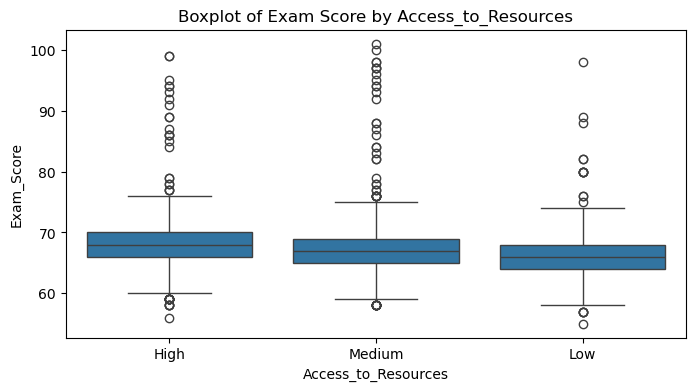

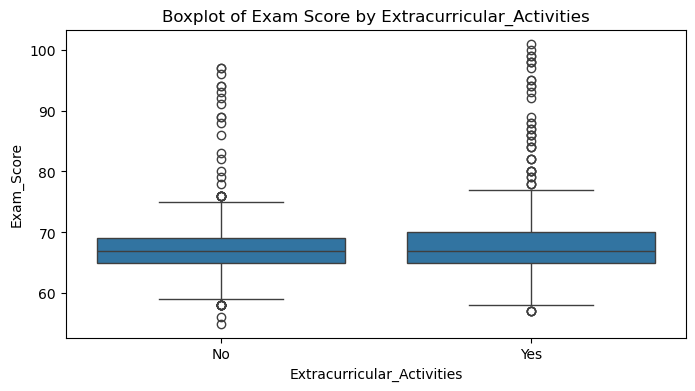

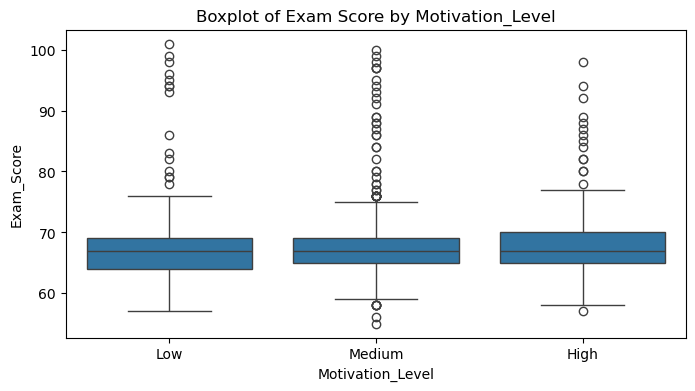

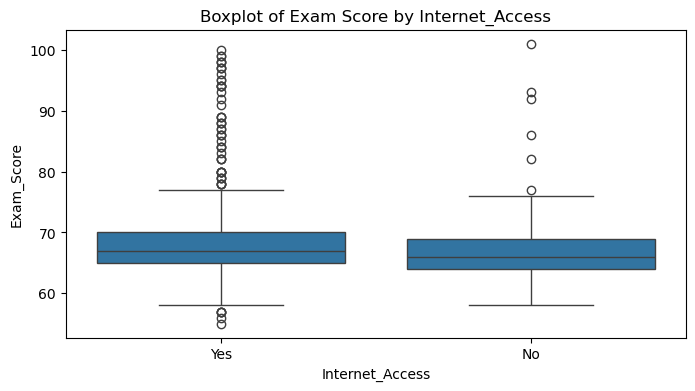

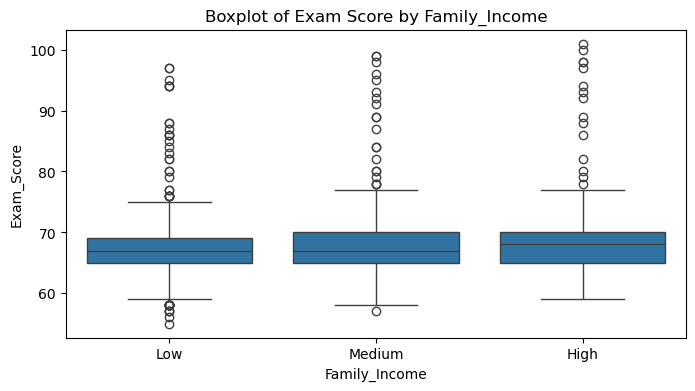

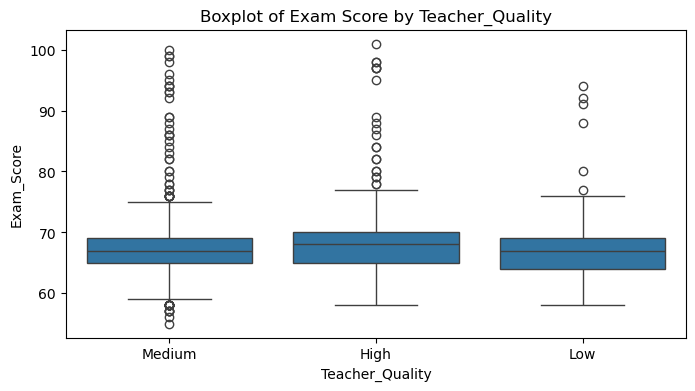

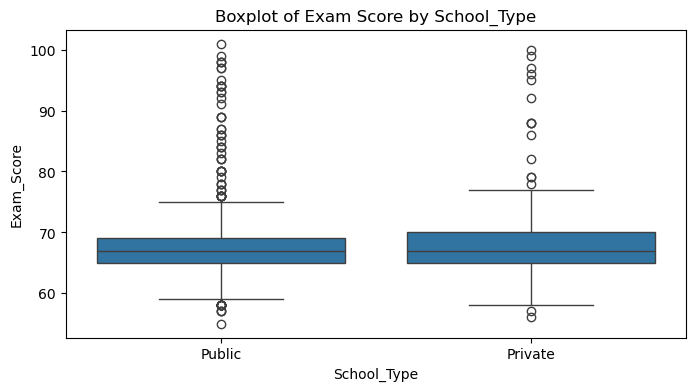

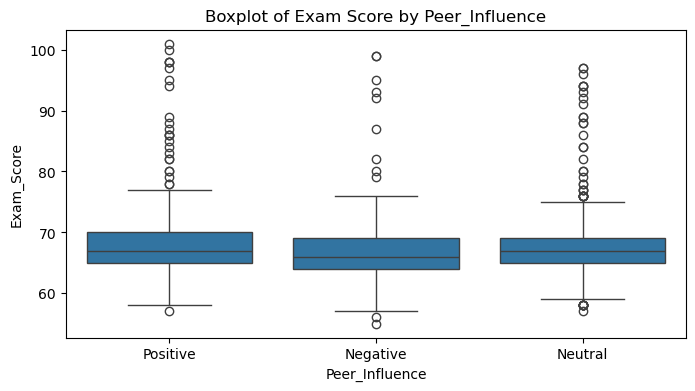

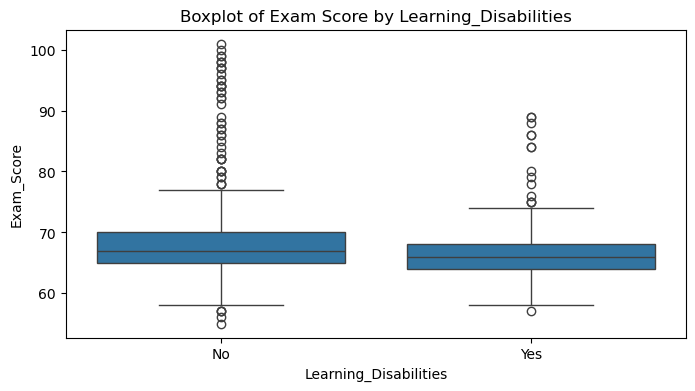

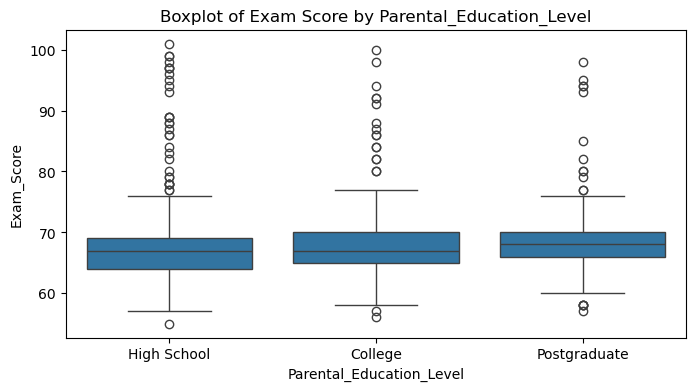

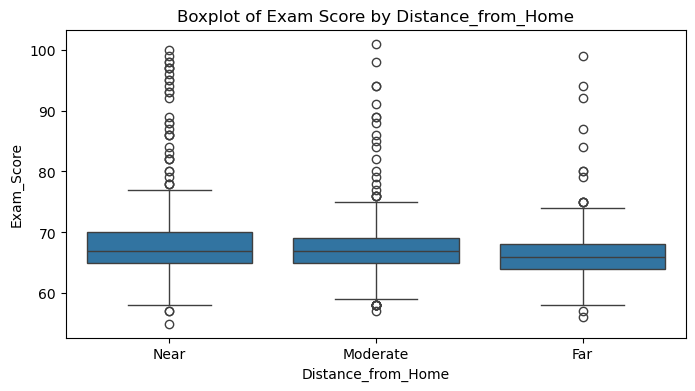

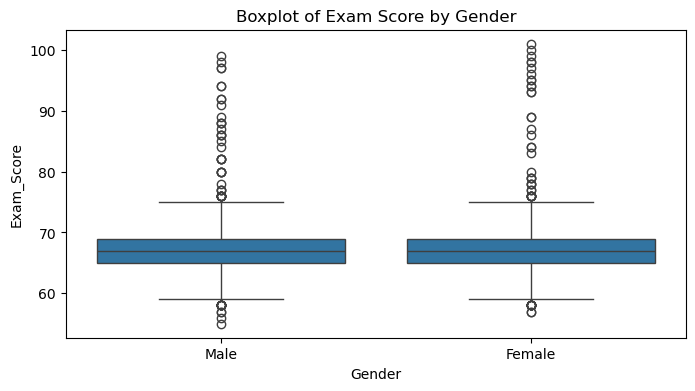

In [54]:
for col in categorical_columns:
    if df[col].nunique() <= 10: 
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=col, y='Exam_Score')
        plt.title(f'Boxplot of Exam Score by {col}')
        plt.show()

# Mean and median exam scores by categories

In [57]:
for col in categorical_columns:
    if df[col].nunique() <= 10:  # Avoid too many categories
        print("----------------")
        print(f"Mean Exam Score by {col}:")
        print(df.groupby(col)['Exam_Score'].mean())
        print(f"Median Exam Score by {col}:")
        print(df.groupby(col)['Exam_Score'].median())

----------------
Mean Exam Score by Parental_Involvement:
Parental_Involvement
High      68.112200
Low       66.378776
Medium    67.113196
Name: Exam_Score, dtype: float64
Median Exam Score by Parental_Involvement:
Parental_Involvement
High      68.0
Low       66.0
Medium    67.0
Name: Exam_Score, dtype: float64
----------------
Mean Exam Score by Access_to_Resources:
Access_to_Resources
High      68.103158
Low       66.223705
Medium    67.156367
Name: Exam_Score, dtype: float64
Median Exam Score by Access_to_Resources:
Access_to_Resources
High      68.0
Low       66.0
Medium    67.0
Name: Exam_Score, dtype: float64
----------------
Mean Exam Score by Extracurricular_Activities:
Extracurricular_Activities
No     66.951770
Yes    67.454951
Name: Exam_Score, dtype: float64
Median Exam Score by Extracurricular_Activities:
Extracurricular_Activities
No     67.0
Yes    67.0
Name: Exam_Score, dtype: float64
----------------
Mean Exam Score by Motivation_Level:
Motivation_Level
High      67.7

In [ ]:
# ordinal_categorical_columns = [
#     'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level','Family_Income',
#     'Teacher_Quality','Peer_Influence','Parental_Education_Level','Distance_from_Home'
# ]

# # nominal_categoircal_columns = [col for col in categorical_columns if not col in ordinal_categorical_columns]
# nominal_categoircal_columns = ['Extracurricular_Activities',
#  'Internet_Access',
#  'School_Type',
#  'Learning_Disabilities',
#  'Gender']

In [ ]:
# ordinal_mappings = {
#     'Parental_Involvement': ['Low', 'Medium', 'High'],
#     'Access_to_Resources': ['Low', 'Medium', 'High'],
#     'Motivation_Level': ['Low', 'Medium', 'High'],
#     'Family_Income': ['Low', 'Medium', 'High'],
#     'Teacher_Quality': ['Low', 'Medium', 'High'],  
#     'Peer_Influence': ['Negative', 'Neutral', 'Positive'],
#     'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],  
#     'Distance_from_Home': ['Near', 'Moderate', 'Far']  
# }

# ordinal_encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_categorical_columns])
# df[ordinal_categorical_columns] = ordinal_encoder.fit_transform(df[ordinal_categorical_columns])

In [ ]:
# df = pd.get_dummies(df, columns=nominal_categoircal_columns, drop_first=True)
# df.head()